## 1. Data Wrangling

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fileName = 'GlobalLandTemperaturesByCountry.csv'
df = pd.read_csv(fileName)
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [4]:
df['Date'] = pd.to_datetime(df['dt'])
df['Country'] = df['Country'].str.upper()
df = df[['Date','Country','AverageTemperature']]

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544811 entries, 0 to 577460
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                544811 non-null  datetime64[ns]
 1   Country             544811 non-null  object        
 2   AverageTemperature  544811 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 16.6+ MB


### Exploring the data

In [6]:
#Number of missing values per column
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count')

,count,%
Date,0,0.0
Country,0,0.0
AverageTemperature,0,0.0


In [7]:
#Check if we have duplicated entries
df[df.duplicated()==True]

,Date,Country,AverageTemperature


In [8]:
#Which are the valid countries today?
import requests
url = 'https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/'
html = requests.get(url).content
df_list = pd.read_html(html)
country_list = pd.DataFrame(df_list[0])
valid_country_list = np.sort(country_list['Country'].str.upper().values)
valid_country_list

array(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANDORRA', 'ANGOLA',
       'ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARMENIA', 'AUSTRALIA',
       'AUSTRIA', 'AZERBAIJAN', 'BAHAMAS', 'BAHRAIN', 'BANGLADESH',
       'BARBADOS', 'BELARUS', 'BELGIUM', 'BELIZE', 'BENIN', 'BHUTAN',
       'BOLIVIA', 'BOSNIA AND HERZEGOVINA', 'BOTSWANA', 'BRAZIL',
       'BRUNEI', 'BULGARIA', 'BURKINA FASO', 'BURUNDI', 'CABO VERDE',
       'CAMBODIA', 'CAMEROON', 'CANADA', 'CENTRAL AFRICAN REPUBLIC',
       'CHAD', 'CHILE', 'CHINA', 'COLOMBIA', 'COMOROS', 'CONGO',
       'COSTA RICA', 'CROATIA', 'CUBA', 'CYPRUS',
       'CZECH REPUBLIC (CZECHIA)', "CÔTE D'IVOIRE", 'DENMARK', 'DJIBOUTI',
       'DOMINICA', 'DOMINICAN REPUBLIC', 'DR CONGO', 'ECUADOR', 'EGYPT',
       'EL SALVADOR', 'EQUATORIAL GUINEA', 'ERITREA', 'ESTONIA',
       'ESWATINI', 'ETHIOPIA', 'FIJI', 'FINLAND', 'FRANCE', 'GABON',
       'GAMBIA', 'GEORGIA', 'GERMANY', 'GHANA', 'GREECE', 'GRENADA',
       'GUATEMALA', 'GUINEA', 'GUINEA-BISSAU', 'GUYANA', 'H

In [9]:
#We expect only 195 countries in the world today, let's see how many there are in this dataset
countries_in_data = df['Country'].unique()
len(df['Country'].unique())
countries_in_data

array(['ÅLAND', 'AFGHANISTAN', 'AFRICA', 'ALBANIA', 'ALGERIA',
       'AMERICAN SAMOA', 'ANDORRA', 'ANGOLA', 'ANGUILLA',
       'ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARMENIA', 'ARUBA', 'ASIA',
       'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN', 'BAHAMAS', 'BAHRAIN',
       'BAKER ISLAND', 'BANGLADESH', 'BARBADOS', 'BELARUS', 'BELGIUM',
       'BELIZE', 'BENIN', 'BHUTAN', 'BOLIVIA',
       'BONAIRE, SAINT EUSTATIUS AND SABA', 'BOSNIA AND HERZEGOVINA',
       'BOTSWANA', 'BRAZIL', 'BRITISH VIRGIN ISLANDS', 'BULGARIA',
       'BURKINA FASO', 'BURMA', 'BURUNDI', "CÔTE D'IVOIRE", 'CAMBODIA',
       'CAMEROON', 'CANADA', 'CAPE VERDE', 'CAYMAN ISLANDS',
       'CENTRAL AFRICAN REPUBLIC', 'CHAD', 'CHILE', 'CHINA',
       'CHRISTMAS ISLAND', 'COLOMBIA', 'COMOROS',
       'CONGO (DEMOCRATIC REPUBLIC OF THE)', 'CONGO', 'COSTA RICA',
       'CROATIA', 'CUBA', 'CURAÇAO', 'CYPRUS', 'CZECH REPUBLIC',
       'DENMARK (EUROPE)', 'DENMARK', 'DJIBOUTI', 'DOMINICA',
       'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT'

In [10]:
import numpy as np
wrong_countries = np.setdiff1d(countries_in_data,valid_country_list)
wrong_countries

array(['AFRICA', 'AMERICAN SAMOA', 'ANGUILLA', 'ARUBA', 'ASIA',
       'BAKER ISLAND', 'BONAIRE, SAINT EUSTATIUS AND SABA',
       'BRITISH VIRGIN ISLANDS', 'BURMA', 'CAPE VERDE', 'CAYMAN ISLANDS',
       'CHRISTMAS ISLAND', 'CONGO (DEMOCRATIC REPUBLIC OF THE)',
       'CURAÇAO', 'CZECH REPUBLIC', 'DENMARK (EUROPE)', 'EUROPE',
       'FALKLAND ISLANDS (ISLAS MALVINAS)', 'FAROE ISLANDS',
       'FEDERATED STATES OF MICRONESIA', 'FRANCE (EUROPE)',
       'FRENCH GUIANA', 'FRENCH POLYNESIA',
       'FRENCH SOUTHERN AND ANTARCTIC LANDS', 'GAZA STRIP', 'GREENLAND',
       'GUADELOUPE', 'GUAM', 'GUERNSEY', 'GUINEA BISSAU',
       'HEARD ISLAND AND MCDONALD ISLANDS', 'HONG KONG', 'ISLE OF MAN',
       'JERSEY', 'KINGMAN REEF', 'MACAU', 'MACEDONIA', 'MARTINIQUE',
       'MAYOTTE', 'MONTSERRAT', 'NETHERLANDS (EUROPE)', 'NEW CALEDONIA',
       'NIUE', 'NORTH AMERICA', 'NORTHERN MARIANA ISLANDS', 'OCEANIA',
       'PALESTINA', 'PALMYRA ATOLL', 'PUERTO RICO', 'REUNION',
       'SAINT BARTHÉLEMY', 

In [11]:
df.replace('CAPE VERDE', 'CABO VERDE', inplace=True)
df.replace('CONGO (DEMOCRATIC REPUBLIC OF THE)', 'DR CONGO', inplace=True)
df.replace('CZECH REPUBLIC', 'CZECH REPUBLIC (CZECHIA)', inplace=True)
df.replace('DENMARK (EUROPE)', 'DENMARK', inplace=True)
df.replace('FEDERATED STATES OF MICRONESIA', 'MICRONESIA', inplace=True)
df.replace('FRANCE (EUROPE)', 'FRANCE', inplace=True)
df.replace('GUINEA BISSAU', 'GUINEA-BISSAU', inplace=True)
df.replace('MACEDONIA', 'NORTH MACEDONIA', inplace=True)
df.replace('NETHERLANDS (EUROPE)', 'NETHERLANDS', inplace=True)
df.replace('SAINT KITTS AND NEVIS', 'SAINT KITTS & NEVIS', inplace=True)
df.replace('SAINT VINCENT AND THE GRENADINES', 'ST. VINCENT & GRENADINES', inplace=True)
df.replace('SAO TOME AND PRINCIPE', 'SAO TOME & PRINCIPE', inplace=True)
df.replace('TIMOR LESTE', 'TIMOR-LESTE', inplace=True)
df.replace('UNITED KINGDOM (EUROPE)', 'UNITED KINGDOM', inplace=True)
#df.replace('', '', inplace=True)
#df.replace('', '', inplace=True)
#df.replace('', '', inplace=True)

In [12]:
# Filter all rows for which the country is valid
df = df[~df['Country'].isin(wrong_countries)]
df.head()

,Date,Country,AverageTemperature
3239,1838-04-01,AFGHANISTAN,13.008
3241,1838-06-01,AFGHANISTAN,23.950
3242,1838-07-01,AFGHANISTAN,26.877
3243,1838-08-01,AFGHANISTAN,24.938
3244,1838-09-01,AFGHANISTAN,18.981


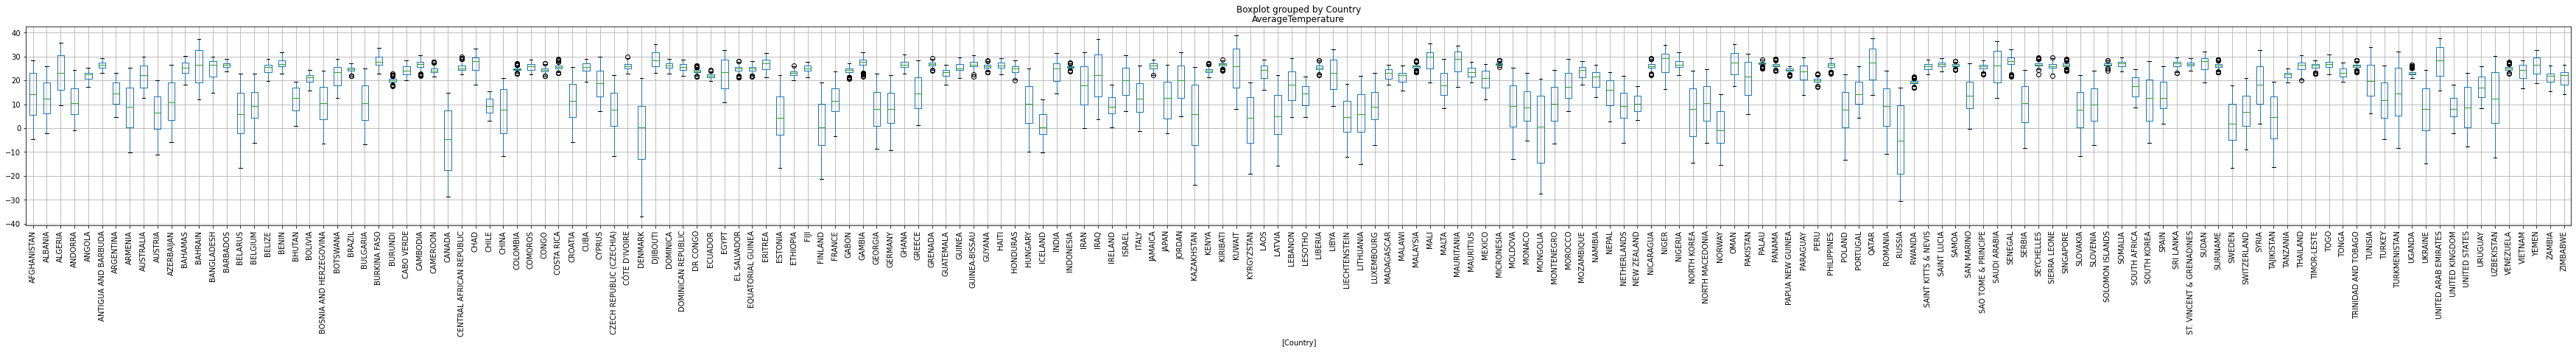

In [13]:
boxplot = df[['Country','AverageTemperature']].boxplot(by='Country',figsize=(60,5), rot=90)
plt.savefig('AverageTempByCountry.jpeg')
#All units seems to be in Celsius

In [14]:
#Select the country for which you want to do the analysis
import ipywidgets as widgets
country = widgets.Dropdown(
    options=valid_country_list,
    value='UNITED STATES',
    description='Country:',
    disabled=False,
)
def plot_country(country):
    temp_df = df[df['Country']==country]
    temp_df = temp_df.set_index('Date')
    temp_df = temp_df.resample('M').mean()
    temp_df.plot(figsize=(30,5))
    return temp_df
display(country)

Dropdown(description='Country:', index=186, options=('AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANDORRA', 'ANGOLA',…

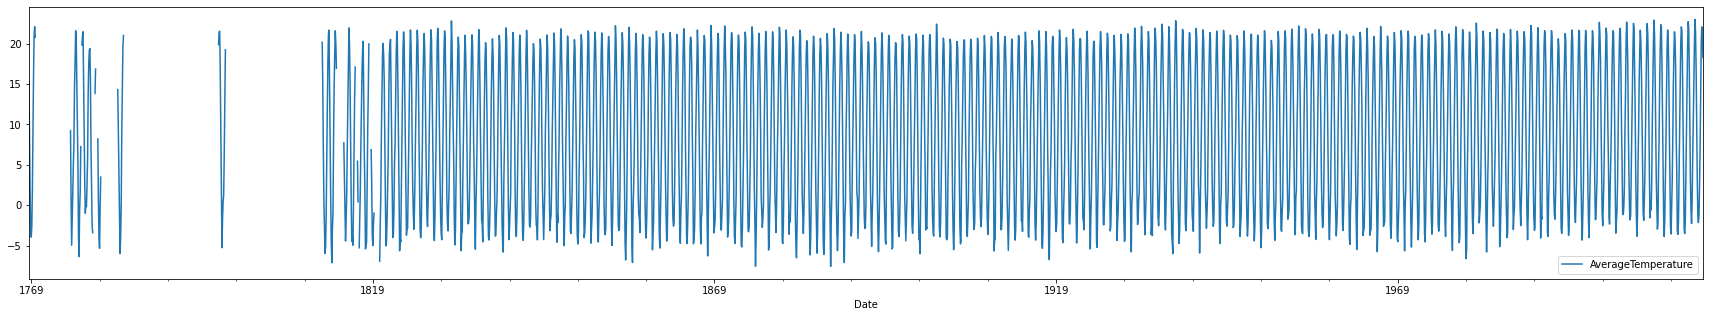

In [15]:
monthly_temp_by_country_df = plot_country(country.value)

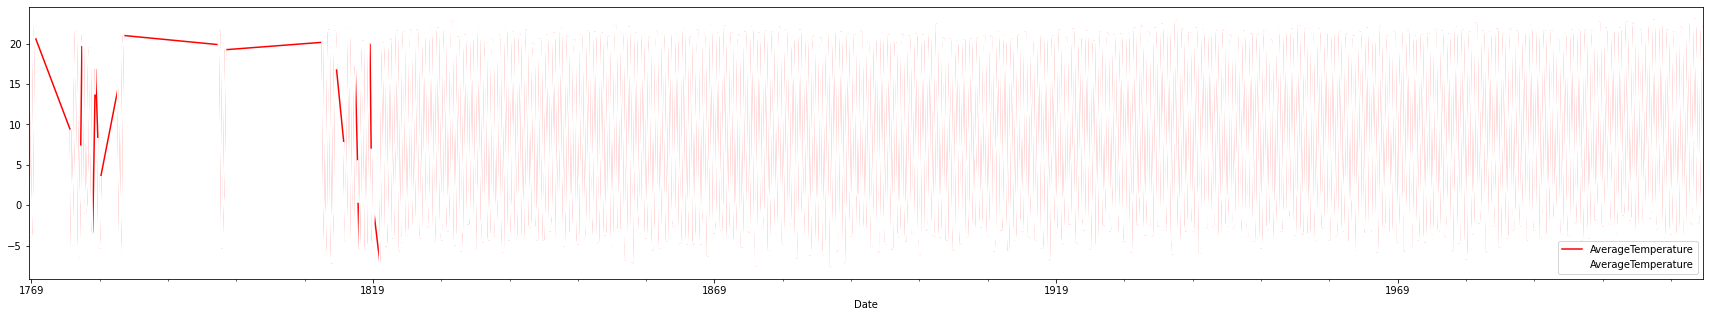

In [16]:
missing = monthly_temp_by_country_df.isna()
temp_interp = monthly_temp_by_country_df.interpolate('linear')
ax = temp_interp.plot(c='r')
monthly_temp_by_country_df.plot(c='white', ax=ax, lw=2, figsize=(30,5))
plt.savefig(country.value+'_adjustedTemp.jpeg')

In [17]:
#There is no point on filling the series with the missing values, so, I will truncate the series after no empty values
import datetime
last_missing_date = missing.index[missing['AverageTemperature']].max()
first_series_date = last_missing_date + datetime.timedelta(days=1)
monthly_temp_by_country_df = monthly_temp_by_country_df[first_series_date:'2021']

In [18]:
monthly_temp_by_country_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2325 entries, 1820-01-31 to 2013-09-30
Freq: M
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  2325 non-null   float64
dtypes: float64(1)
memory usage: 36.3 KB


<AxesSubplot:xlabel='Date'>

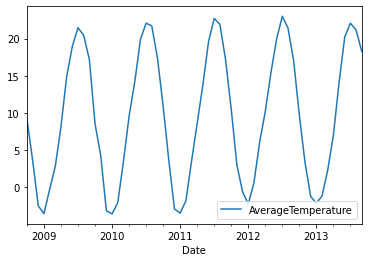

In [19]:
#Plotting the last 5 years
monthly_temp_by_country_df[-60:].plot()

## 2. Exploratory Data Analysis

In [20]:
#Validate that the data is stationary
from statsmodels.tsa.stattools import adfuller

X = monthly_temp_by_country_df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.377479
p-value: 0.000325
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Since the p-value is less than 0.05, we reject the NULL hypothesis (the time series has a unit root, meaning it is non-stationary) and we can say that "he data does not have a unit root and is stationary"

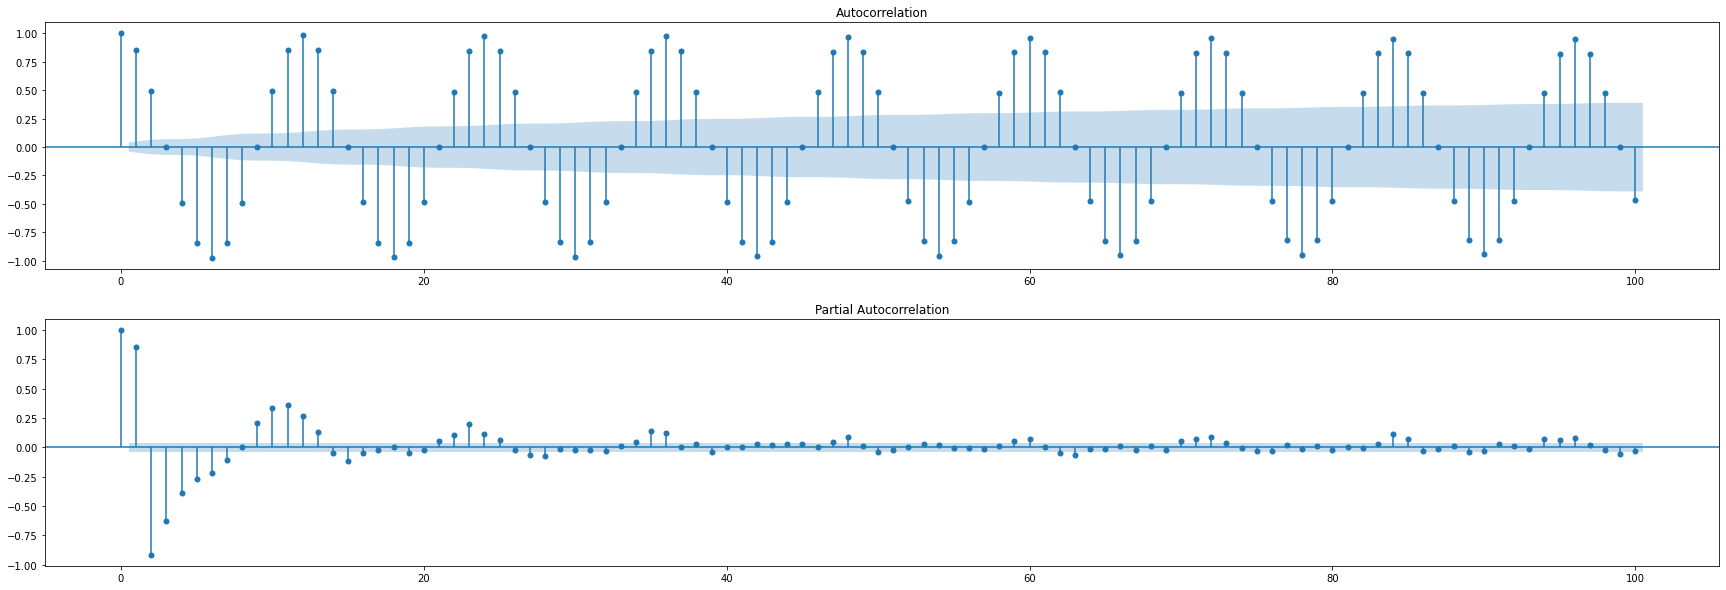

In [21]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Compute the acf array of monthly_temp_by_country_df
#acf_array = acf(monthly_temp_by_country_df)
#print(acf_array)

# Plot the acf function
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(30, 10))
plot_acf(monthly_temp_by_country_df,lags=100,alpha=0.05,ax=ax1)
plot_pacf(monthly_temp_by_country_df,lags=100,alpha=0.05,ax=ax2)
plt.show()

As we can see, the strongest correlation is on lag 6 and lag 12, which will correspond to Jul and December. Since both the ACF and the PACF tails off, we have an ARMA model

Now, let's obtain the seasonality and trend to find out if we have an additive or multiplicative change over time.

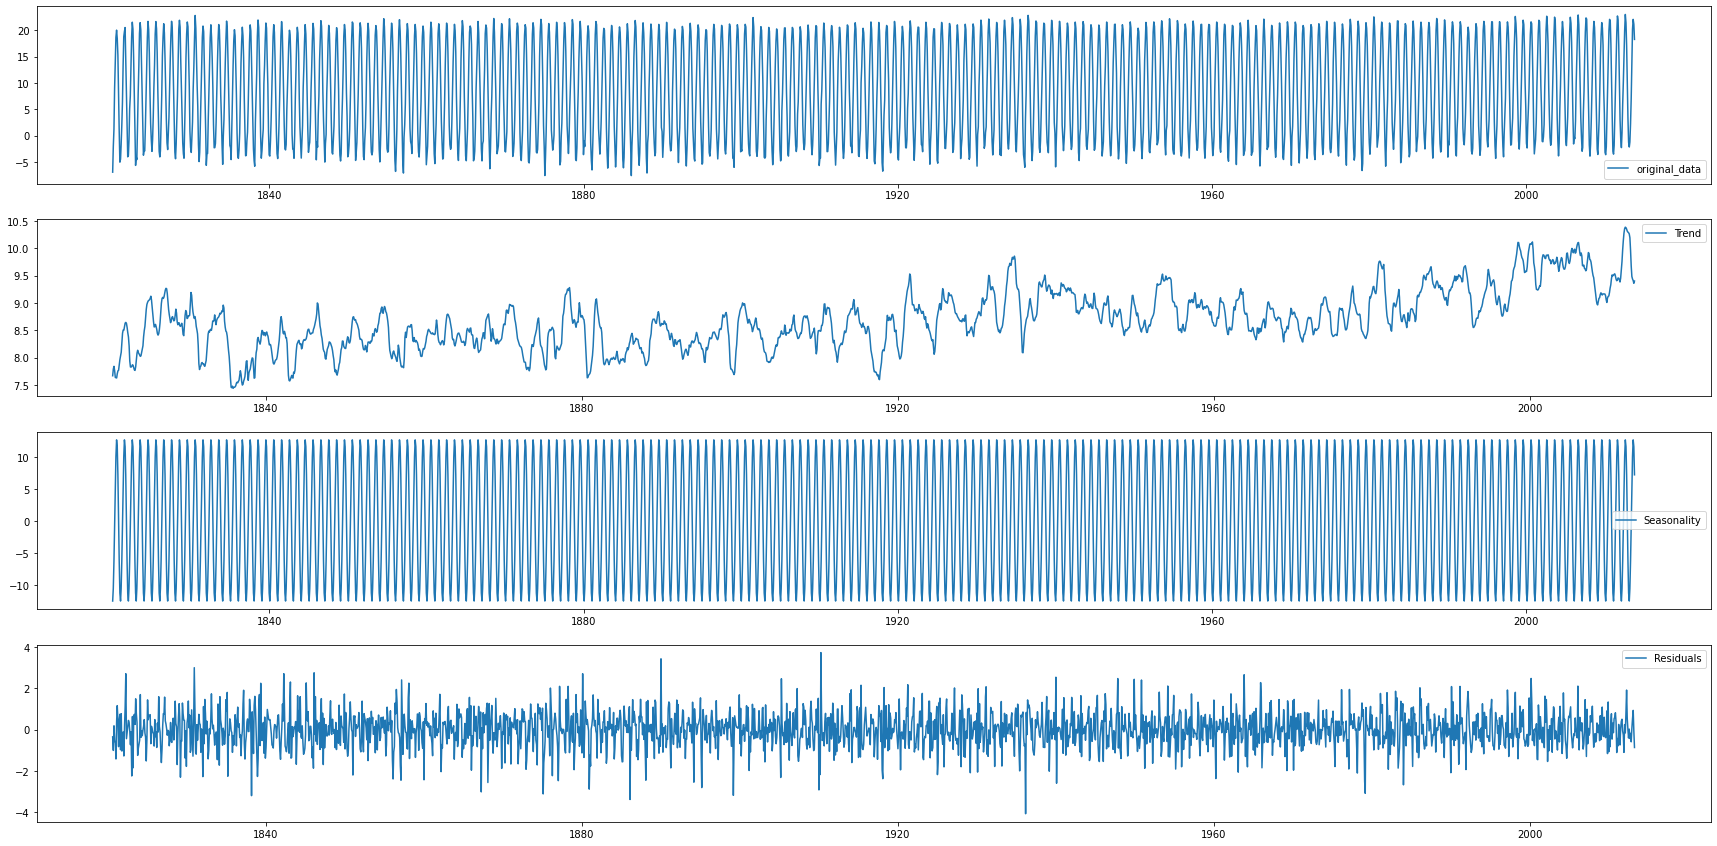

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_temp_by_country_df)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#I am plotting the original data, the trend, the seasonality and the residuals
plt.figure(figsize=(30,15))

plt.subplot(411)
plt.plot(monthly_temp_by_country_df, label="original_data")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="best")

plt.savefig('decomposition.jpeg')

Since the linear seasonality has the same amplitude and frequency over time, we can say this has an additive seasonality.

Let's see if we have anomalies in the data

In [23]:
def detect_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
df_with_no_outliers = monthly_temp_by_country_df.apply(detect_outliers)

outliers = pd.concat([monthly_temp_by_country_df,df_with_no_outliers]).drop_duplicates(keep=False)
outliers

,AverageTemperature
Date,


## 3. Pre-processing and Training Data

In [24]:
X = monthly_temp_by_country_df
y = monthly_temp_by_country_df['AverageTemperature']
min_avg_temp_in_country = np.min(monthly_temp_by_country_df['AverageTemperature'])
max_avg_temp_in_country = np.max(monthly_temp_by_country_df['AverageTemperature'])
years = 3
print("The prediction range will go from ",min_avg_temp_in_country, " to ", max_avg_temp_in_country, "°C")
print("This gives us a range of ", np.abs(min_avg_temp_in_country)+np.abs(max_avg_temp_in_country) ,"°C for accuracy")

The prediction range will go from  -7.581  to  23.008000000000006 °C
This gives us a range of  30.589000000000006 °C for accuracy


## 4. Modeling

In [25]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [26]:
#Split the data with 3 years for testing and the rest for trainig to get the ARIMA model
train = X[:-(12*years)]
test = X[(-12*years):]

In [27]:
print("training from ",train[:1].index.values, " to ", train[-1:].index.values, " with ", len(train), " size")

training from  ['1820-01-31T00:00:00.000000000']  to  ['2010-09-30T00:00:00.000000000']  with  2289  size


In [28]:
print("testing from ",test[:1].index.values, " to ", test[-1:].index.values, " with ", len(test), " size")

testing from  ['2010-10-31T00:00:00.000000000']  to  ['2013-09-30T00:00:00.000000000']  with  36  size


### 4.1 ARIMA model

In [29]:
arima_model = auto_arima(train, 
                         m=12,
                         start_p=6, start_q=0, 
                         max_p=12, max_d=5, max_q=5, 
                         start_P=6, start_Q=0, 
                         max_P=12, max_D=5, max_Q=5, 
                         seasonal=True, error_action='ignore', trace=True, 
                         supress_warnings=True, stepwise=True, random_state=20, n_fits = 50)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(6,0,0)(6,0,0)[12] intercept   : AIC=inf, Time=289.51 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=16538.981, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=3.34 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=12245.511, Time=1.97 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=18051.531, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=14052.973, Time=0.71 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=5.39 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=11282.317, Time=7.69 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=15.63 sec
 ARIMA(0,0,1)(0,0,3)[12] intercept   : AIC=10530.786, Time=16.56 sec
 ARIMA(0,0,1)(1,0,3)[12] intercept   : AIC=11609.305, Time=22.23 sec
 ARIMA(0,0,1)(0,0,4)[12] intercept   : AIC=9921.216, Time=28.97 sec
 ARIMA(0,0,1)(1,0,4)[12] intercept   : AIC=6466.488, Time=68.13 sec
 ARIMA(0,0,1)(2,0,4)[12] intercept   : AIC=inf, Time=94.12 sec
 ARIMA(0,0,1)(1,0,5)[12] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                          y   No. Observations:                 2289
Model:             SARIMAX(1, 0, 4)x(1, 0, [1, 2, 3], 12)   Log Likelihood               -3146.799
Date:                                    Mon, 16 Aug 2021   AIC                           6313.599
Time:                                            14:18:43   BIC                           6370.958
Sample:                                                 0   HQIC                          6334.516
                                                   - 2289                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9375      0.021     44.064      0.000       0.896       0.979
ma.L1         -0.7591      0.031    -24.351      0.000      -0.820      -0.698
ma.L2         -0.0510      0.022     -2.337      0.019      -0.094      -0.008
ma.L3         -0.0460      0.023     -2.009      0.045      -0.091      -0.001
ma.L4         -0.0166      0.020     -0.840      0.401      -0.055       0.022
ar.S.L12       0.9998   9.87e-05   1.01e+04      0.000       1.000       1.000
ma.S.L12      -0.9394      0.013    -71.662      0.000      -0.965      -0.914
ma.S.L24      -0.0319      0.009     -3.529      0.000      -0.050      -0.014
ma.S.L36       0.0783      0.004     17.490      0.000       0.070       0.087
sigma2         0.8916      0.021     42.118      0.000       0.850       0.933
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               156.16
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Since the Prob(Q) is not less than 0.05 and the Prob(JB) is also less than 0.05, we reject the NULL hypothesis and conclude that the data is correlated and is normally distributed.

In [30]:
sarimax_model = SARIMAX(train, order=(1,0,4), seasonal_order=(1,2,3, 12),enforce_invertibility=True)
sarimax_results = sarimax_model.fit()
pred = pd.DataFrame(sarimax_results.get_forecast(steps=(years*12)).predicted_mean.values,index=test.index)
pred.columns = ['PredictedTemperature']

mae = sarimax_results.mae

# Print mean absolute error
print("the mean error of degrees per month is: ")
print(mae)

C:\Users\Miguel-BarrigaSerran\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


the mean error of degrees per month is: 
0.805219853784566


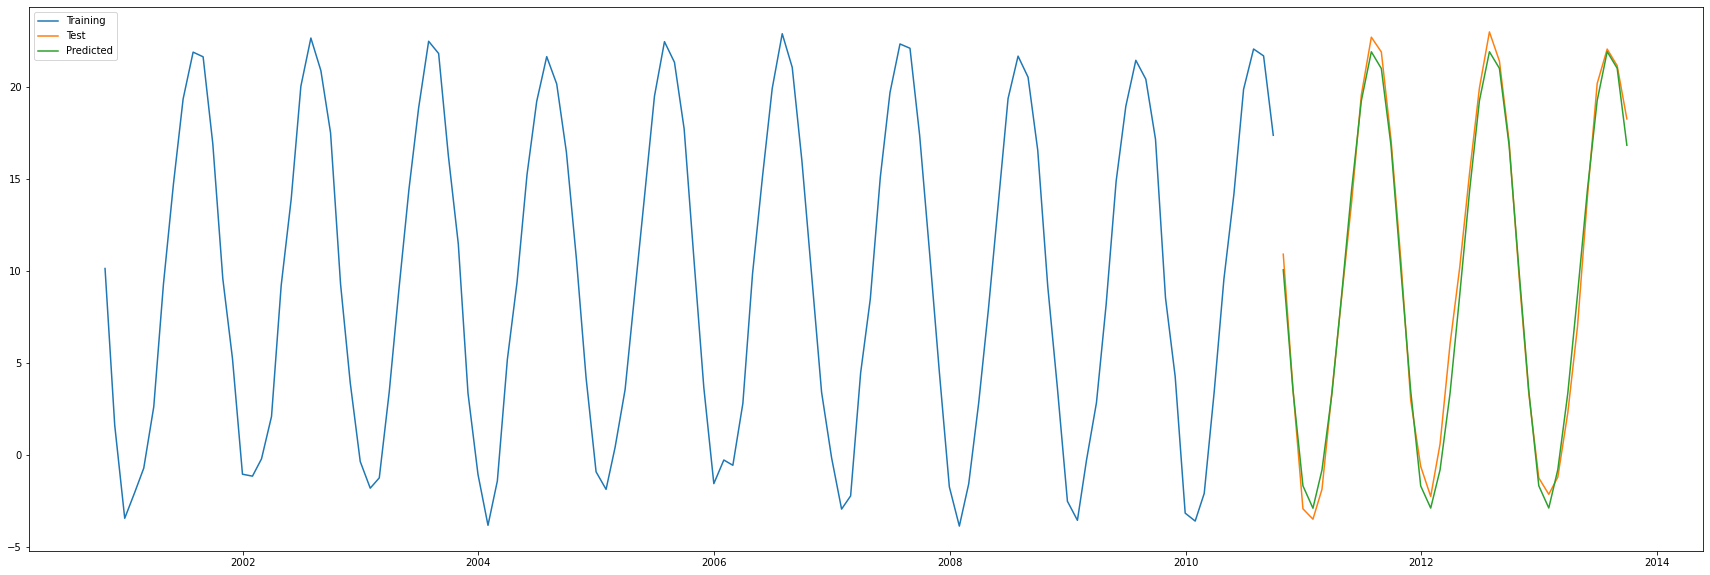

In [31]:
plt.figure(figsize=(30,10))
plt.plot(train[(-10*12):],label="Training")
plt.plot(test,label='Test')
plt.plot(pred,label='Predicted')
plt.legend(loc='upper left')
plt.show()

In [32]:
pred['Tested'] = test
pred

,PredictedTemperature,Tested
Date,,
2010-10-31,10.064821,10.913
2010-11-30,3.523445,3.601
2010-12-31,-1.691170,-2.942
2011-01-31,-2.910865,-3.507
2011-02-28,-0.826285,-1.881
2011-03-31,3.343491,3.462
2011-04-30,8.695140,8.582
2011-05-31,14.448779,13.759
2011-06-30,19.263225,19.578


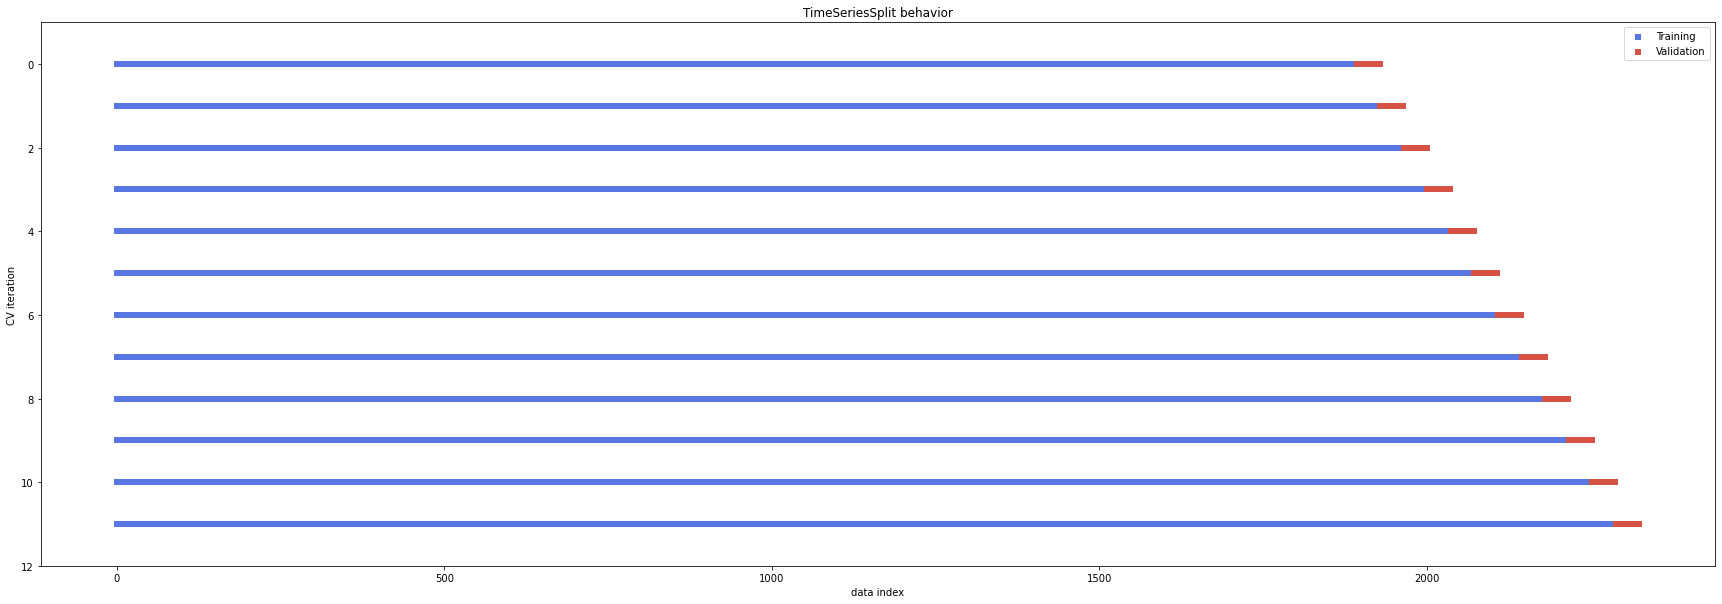

In [33]:
# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings
warnings.simplefilter('ignore', ConvergenceWarning)

# Create time-series cross-validation object
n_splits = 12
cv = TimeSeriesSplit(n_splits=n_splits,test_size=(years*12))
mae_array = []

# Iterate through CV splits
fig, ax = plt.subplots(figsize=(30, 10))
for ii, (tr, ts) in enumerate(cv.split(X, y)):
    internal_model = SARIMAX(tr, order=(1,0,4), seasonal_order=(1,2,3, 12),enforce_invertibility=True)
    internal_results = internal_model.fit()
    internal_results.forecast(steps=(years*12))#
    mae_array.append(internal_results.mae)
    
    #Plot training and test indices
    l1 = ax.scatter(tr, [ii] * len(tr), c=[plt.cm.coolwarm(.1)], marker='_', lw=6)
    l2 = ax.scatter(ts, [ii] * len(ts), c=[plt.cm.coolwarm(.9)], marker='_', lw=6)


ax.set(ylim=[12, -1], title='TimeSeriesSplit behavior', xlabel='data index', ylabel='CV iteration')
ax.legend([l1, l2], ['Training','Validation'])

plt.show()

In [34]:
print(mae_array)
print("The average mae of the model is ",np.mean(mae_array))

[0.09350237717908082, 0.09175738724727839, 0.0900763358778626, 0.08845577211394302, 0.08689248895434462, 0.085383502170767, 0.08392603129445235, 0.08251748251748252, 0.0811554332874828, 0.07983761840324763, 0.07856191744340879, 0.07732634338138926]
The average mae of the model is  0.08494939082256166


### 4.2 Prophet model

In [35]:
from prophet import Prophet

prophet_model = Prophet()
prophet_model.fit(train.reset_index().rename(columns={"Date": "ds", "AverageTemperature": "y"}))

future = prophet_model.make_future_dataframe(periods=(years*12),freq='M',include_history=False)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
forecast = prophet_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-10-31,10.567944,9.383638,11.737294
1,2010-11-30,3.628426,2.394051,4.801409
2,2010-12-31,-1.532439,-2.690505,-0.315603
3,2011-01-31,-2.932383,-4.114033,-1.689832
4,2011-02-28,-0.919214,-2.110343,0.317174


In [37]:
test.head()

,AverageTemperature
Date,
2010-10-31,10.913
2010-11-30,3.601
2010-12-31,-2.942
2011-01-31,-3.507
2011-02-28,-1.881


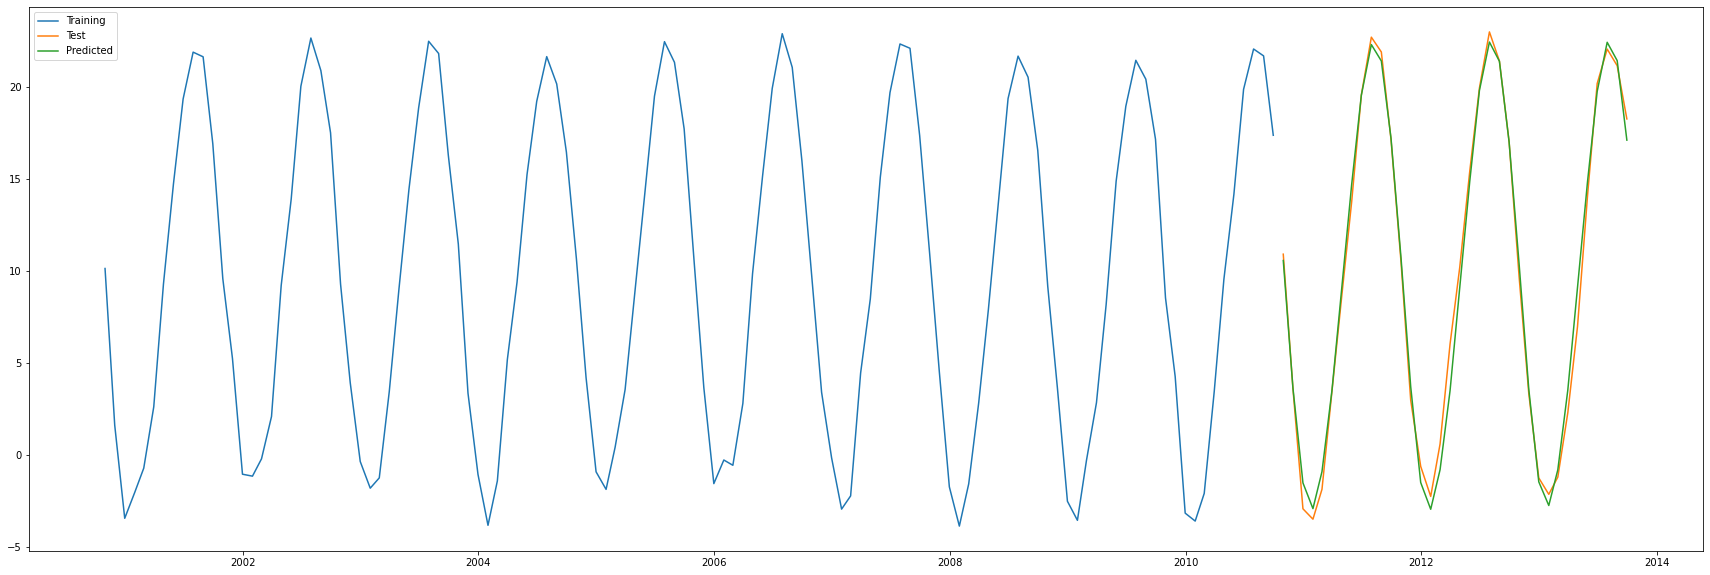

In [38]:
plt.figure(figsize=(30,10))
plt.plot(train[(-10*12):],label="Training")
plt.plot(test,label='Test')
plt.plot(forecast[['ds','yhat']].rename(columns={"ds": "Date", "y": "AverageTemperature"}).set_index('Date'),label='Predicted')
plt.legend(loc='upper left')
plt.show()

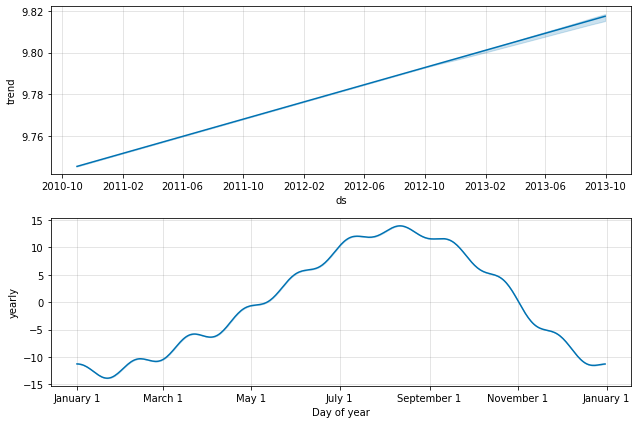

In [39]:
fig = prophet_model.plot_components(forecast)

In [40]:
from prophet.diagnostics import cross_validation
#cutoffs = train[(-12*years):-1].index.values
df_cv = cross_validation(prophet_model, initial=pd.to_timedelta(len(train)*(30),unit="D"), horizon = pd.to_timedelta(365,unit="D"))
#df_cv = cross_validation(prophet_model, cutoffs=cutoffs, horizon = pd.to_timedelta(1,unit="D"))

from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

INFO:prophet:Making 4 forecasts with cutoffs between 2008-03-31 12:00:00 and 2009-09-30 00:00:00


In [41]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,31 days 00:00:00,1.854269,1.361716,1.305798,0.154480,0.141789,0.142629,0.50
1,60 days 12:00:00,1.637067,1.279479,1.095266,0.112180,0.108323,0.103503,0.25
2,61 days 00:00:00,0.445440,0.667413,0.493587,0.066927,0.051523,0.069586,0.75
3,90 days 12:00:00,0.306959,0.554039,0.485097,0.060297,0.031204,0.063530,1.00
4,92 days 00:00:00,1.162244,1.078074,0.978123,0.250732,0.228407,0.324357,0.75


In [42]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
18,305 days 12:00:00,0.568368,0.753902,0.709225,0.124451,0.129258,0.137756,1.00
19,333 days 12:00:00,0.765930,0.875174,0.834481,0.672088,0.409393,0.560425,0.75
20,335 days 00:00:00,0.725030,0.851487,0.762427,0.577777,0.320663,0.452269,0.75
21,364 days 12:00:00,0.390903,0.625223,0.515414,0.082457,0.036482,0.075511,1.00
22,365 days 00:00:00,0.136043,0.368841,0.269772,0.071315,0.018926,0.064664,1.00


In [43]:
print("The average mae of the model is ",np.mean(df_p['mae']))

The average mae of the model is  0.7556758033411416


### 4.3 Forcasting the future

In [45]:
from dateutil.relativedelta import relativedelta
future_index = [(max(X.index) + relativedelta(months=1)) + relativedelta(months=i) for i in range(years*12)] 
future_sarimax_model = SARIMAX(X, order=(1,0,4), seasonal_order=(1,2,3, 12),enforce_invertibility=True)
future_sarimax_results = future_sarimax_model.fit()
future_pred = pd.DataFrame(future_sarimax_results.get_forecast(steps=(years*12)).predicted_mean.values,index=future_index)
future_pred.columns = ['PredictedTemperature']

C:\Users\Miguel-BarrigaSerran\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [46]:
future_prophet_model = Prophet()
future_prophet_model.fit(X.reset_index().rename(columns={"Date": "ds", "AverageTemperature": "y"}))

future_df = future_prophet_model.make_future_dataframe(periods=(years*12),freq='M',include_history=False)

prophet_forecast = future_prophet_model.predict(future_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


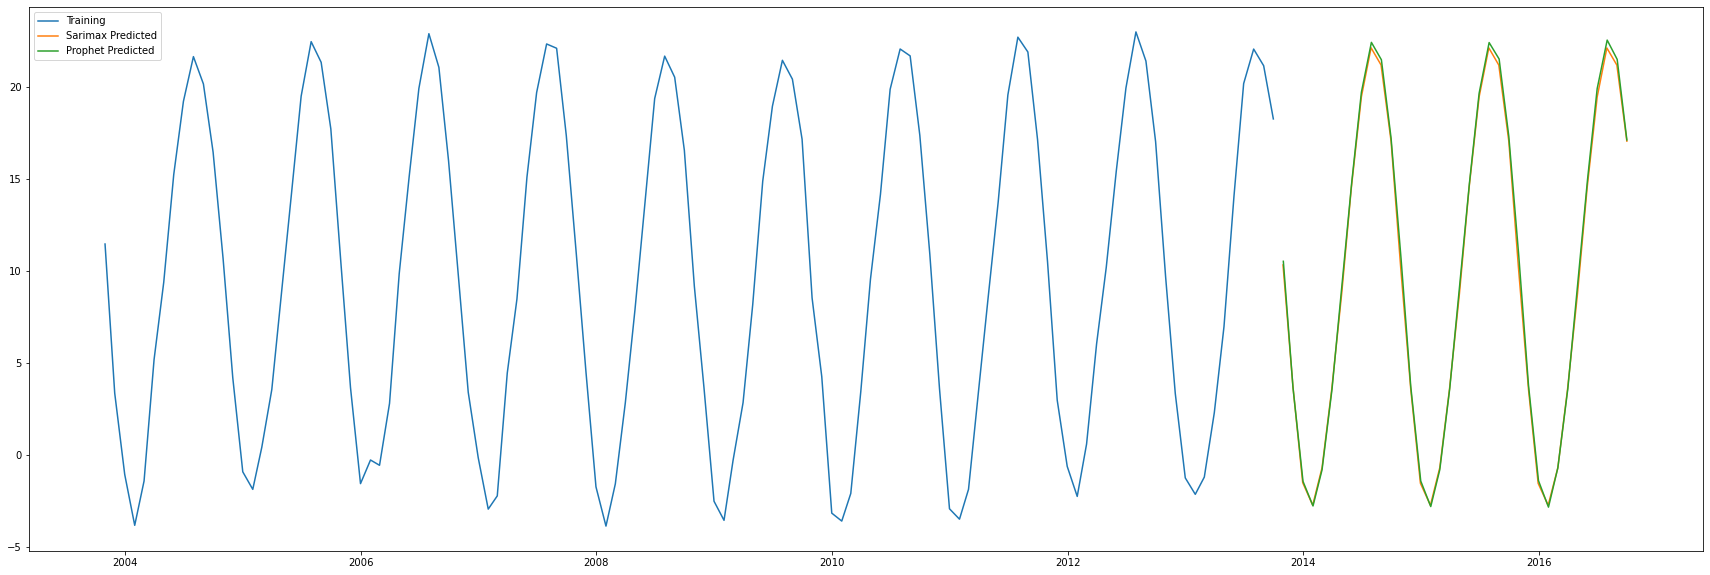

In [47]:
plt.figure(figsize=(30,10))
plt.plot(X[(-10*12):],label="Training")
plt.plot(future_pred,label='Sarimax Predicted')
plt.plot(prophet_forecast[['ds','yhat']].rename(columns={"ds": "Date", "y": "AverageTemperature"}).set_index('Date'),label='Prophet Predicted')

plt.legend(loc='upper left')
plt.show()

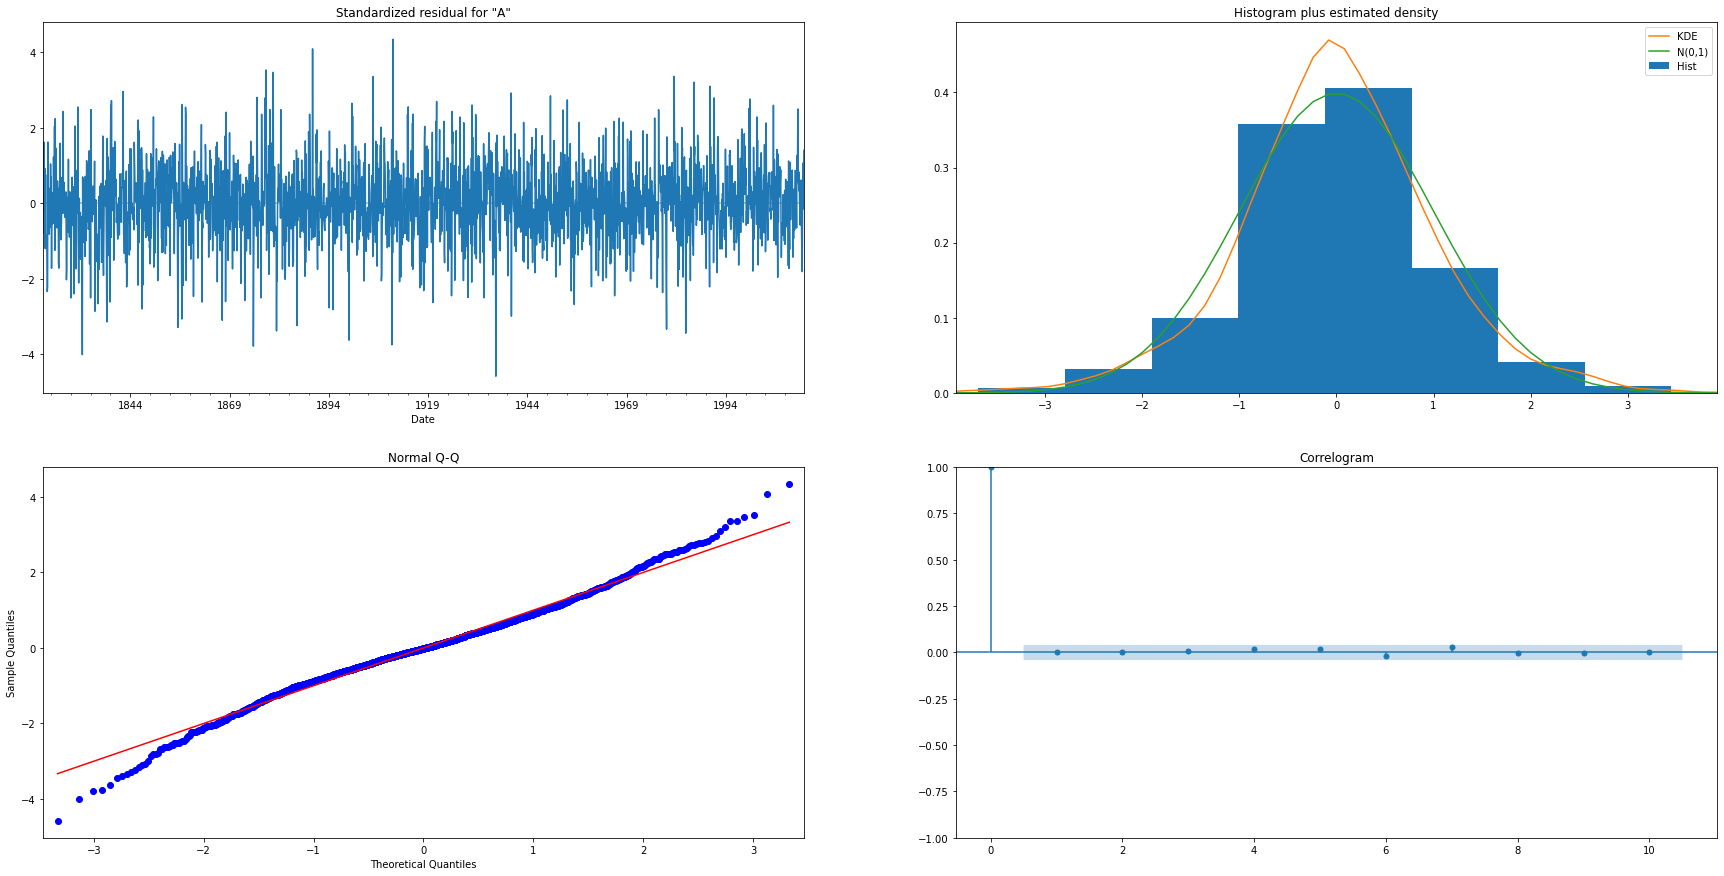

In [48]:
# Create the 4 diagostics plots
future_sarimax_results.plot_diagnostics(figsize=(30,15))
plt.show()

In the Phophet model

The performance_metrics utility can be used to compute some useful statistics of the prediction performance (yhat, yhat_lower, and yhat_upper compared to y), as a function of the distance from the cutoff (how far into the future the prediction was). The statistics computed are mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE), median absolute percent error (MDAPE) and coverage of the yhat_lower and yhat_upper estimates. These are computed on a rolling window of the predictions in df_cv after sorting by horizon (ds minus cutoff). By default 10% of the predictions will be included in each window, but this can be changed with the rolling_window argument.

In [49]:
from prophet.plot import plot_cross_validation_metric
future_prophet_cv = cross_validation(future_prophet_model, initial=pd.to_timedelta(len(X)*(30),unit="D"), horizon = pd.to_timedelta(365,unit="D"))

future_df_p = performance_metrics(future_prophet_cv)

INFO:prophet:Making 4 forecasts with cutoffs between 2011-04-01 12:00:00 and 2012-09-30 00:00:00


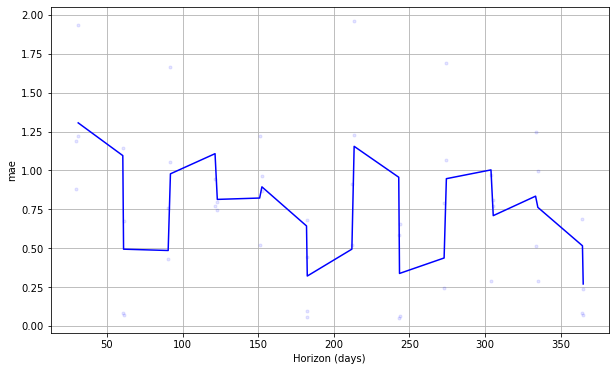

In [50]:
fig = plot_cross_validation_metric(df_cv, metric='mae')

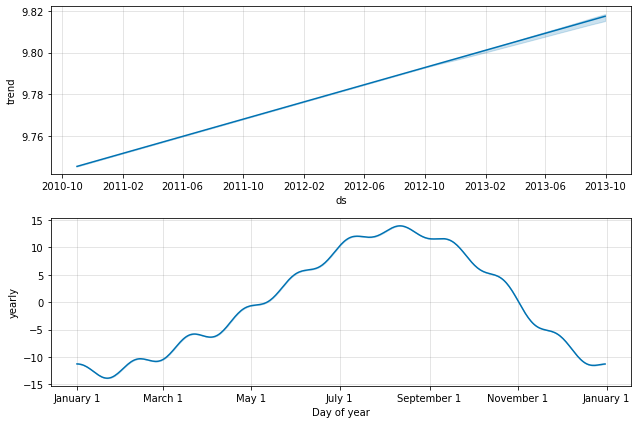

In [51]:
fig = prophet_model.plot_components(forecast)